<a href="https://colab.research.google.com/github/Nongbon/208499/blob/main/draft_lable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Nongbon/208499/main/ETH.csv

--2021-09-26 09:50:59--  https://raw.githubusercontent.com/Nongbon/208499/main/ETH.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 504403 (493K) [text/plain]
Saving to: ‘ETH.csv.4’

ETH.csv.4           100%[===================>] 492.58K  --.-KB/s    in 0.04s   

2021-09-26 09:50:59 (10.7 MB/s) - ‘ETH.csv.4’ saved [504403/504403]



In [80]:
!pip install pandas_ta

     |████████████████████████████████| 115 kB 4.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=3db0c0a874debb8096bb36e7e1c21a3d8ca5c780bcec3c53a269296825868519
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [2]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

In [3]:
data = pd.read_csv("ETH.csv").drop(["slug","name","symbol","ref_cur","time_open","time_close","time_high","time_low","id","market_cap"],axis=1)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.rename({'timestamp':'date'},axis=1)
data['date'] = data['date'].map(lambda x: x.rstrip('23:59:59'))
data['date'] = pd.to_datetime(data['date'])
data

,date,open,high,low,close,volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,1.643290e+05
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06
...,...,...,...,...,...,...
2232,2021-09-16,3613.073624,3673.310899,3489.805745,3571.294935,2.009390e+10
2233,2021-09-17,3569.568210,3589.305140,3356.449969,3398.538778,1.772236e+10
2234,2021-09-18,3397.422739,3540.807599,3371.892406,3432.018235,1.599522e+10
2235,2021-09-19,3433.287959,3448.322105,3286.172425,3329.447895,1.425761e+10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2237 non-null   datetime64[ns]
 1   open    2237 non-null   float64       
 2   high    2237 non-null   float64       
 3   low     2237 non-null   float64       
 4   close   2237 non-null   float64       
 5   volume  2237 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 105.0 KB


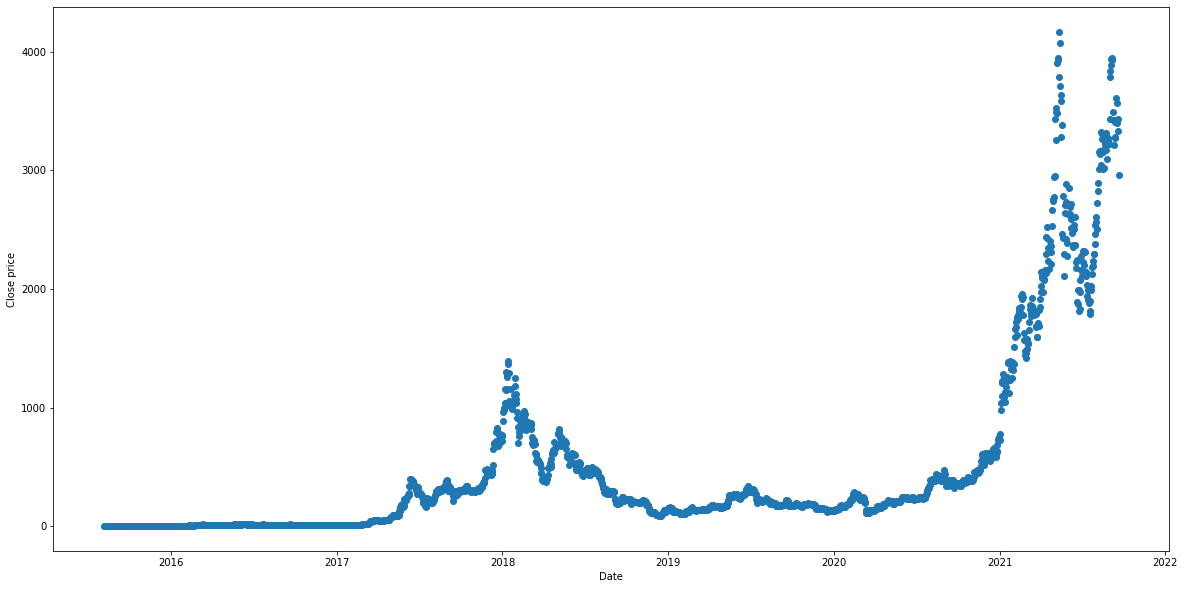

In [5]:
plt.figure(figsize=(20,10))
plt.plot_date(data['date'],data['close'])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

In [6]:
n = len(data)
n

2237

In [8]:
data['label'] = ''
for i in range(len(data)) :
  if i+1 < n :
    data['label'][i+1] = data['close'][i+1] / data['close'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
data['Y'] = ''
for i in range(len(data)) :
  if i+1 < n :
    if data['label'][i+1] > 1 :
      data['Y'][i+1] = 1
    else : 
      data['Y'][i+1] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### **Input Indicator** 

In [10]:
t_period = 10

WMA 10

In [ ]:
weights = np.arange(1,11)
weights

In [ ]:
data['wma10'] = ''
data['wma10'] = data['close'].rolling(t_period).apply(lambda close: np.dot(close, weights)/weights.sum(), raw=True)

SMA 10

In [ ]:
data['sma10'] = ''
data['sma10'] = data['close'].rolling(t_period).mean()

MACD

In [ ]:
exp1 = data['close'].ewm(span = 12 , adjust = False , min_periods=12).mean()
exp2 = data['close'].ewm(span = 26 , adjust = False , min_periods=26).mean()
macd = exp1 - exp2
data['MACD'] = macd

Stochastic (%K) 14

In [ ]:
k_period = 14
# Adds a "n_high" column with max value of previous 14 periods
n_high = data['high'].rolling(k_period).max()
# Adds an "n_low" column with min value of previous 14 periods
n_low = data['low'].rolling(k_period).min()
# Uses the min/max values to calculate the %k (as a percentage)
data['%K'] = (data['close'] - n_low)  / (n_high - n_low) * 100

RSI The first RS value requires the price from all 14 of the first trading days

In [ ]:
def rsi(data, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = data['close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [ ]:
data['RSI'] = rsi(data, periods = 14, ema = True)

Williams (%R)

In [ ]:
def get_wr(high, low, close, periods = 14):
    highh = high.rolling(14).max() 
    lowl = low.rolling(14).min()
    wr = -100 * ((highh - close) / (highh - lowl))
    return wr

data['%R'] = get_wr(data['high'], data['low'], data['close'], periods = 14)

## **Graph Indicator**

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(data['close'], label="close")
plt.plot(data['wma10'], label="10-Day WMA" , color='lime')
plt.plot(data['sma10'], label="10-Day SMA", color='red')
plt.plot(data['%K'], label="Stochastic 14-Day", color='yellow')
plt.plot(data['RSI'], label="Relative Strength Index (RSI) 14-Day", color='blue')
plt.plot(data['%R'], label="Williams %R  14-Day", color='Black')
plt.plot(data['MACD'], label="MACD", color='pink')
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.show()

## **Correlation Test**

In [ ]:
from scipy.stats import spearmanr
cor,p = spearmanr(data['Y'][13:],data['%K'][13:])
print(cor,p)

In [ ]:
data.corr()['close']

# **WMA 10**

## **MACD**

In [ ]:
#data.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)